In [72]:
import torch
from torch import nn as nn
from torch.utils.data import DataLoader
from torch import optim
import matplotlib.pyplot as plt
from torch.nn import functional as F
from torchvision.datasets import ImageFolder
from torchvision import transforms, models

In [73]:
DEVICE = torch.device("cpu")

In [74]:
transformations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [75]:
train_data = ImageFolder(r"D:\iskustvenii intileng\CNN\dataset\training_set", transform=transformations)
test_data = ImageFolder(r"D:\iskustvenii intileng\CNN\dataset\test_set", transform=transformations)

In [76]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [77]:
!conda upgrade -c conda-forge matplotlib

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [78]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        self.flatten = nn. flatten()
        self.fc1 = nn.Linear()
        self.fc1 = nn.Linear(128*28*28, 256)
        self.fc2 = nn.Linear(156,128)
        self.fc3 = nn.Linear(128,1)
        
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        return out                

In [79]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128*28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)
    
    def forward(self, x):
        out = self.pool1(F.relu(self.conv1(x)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = torch.sigmoid(self.fc3(out))
        return out

In [92]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)
    
    for epoch in range(n_epochs):
        for examples, labels in train_loader:
            examples = examples.to(DEVICE)
            labels = labels.to(DEVICE)
            
            labels = labels.unsqueeze(1)
            
            output = model(examples.float())
            loss = loss_fn(output, labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy), (test_loader, test_accuracy)]:
                correct = 0
                total = 0
                
                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1,1)
                    
                    outputs = model(examples.float())
                    predicted = torch.round(outputs)
                    
                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
                accuracy[epoch] = correct / total
        print(f"EPOCH - {epoch+1}\n Train Accuracy - {train_accuracy[epoch]} \n Test Accuracy - {test_accuracy[epoch]}")
    if print_plot:
        epochs = range(n_epochs)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [93]:
import numpy as np
train_data = torch.utils.data.Subset(train_data, np.random.choice(len(train_data), 
                                                                  1000, replace=False))
test_data = torch.utils.data.Subset(test_data, np.random.choice(len(test_data), 
                                                                200, replace=False))

In [94]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

EPOCH - 1
 Train Accuracy - 0.6060000061988831 
 Test Accuracy - 0.5950000286102295
EPOCH - 2
 Train Accuracy - 0.6449999809265137 
 Test Accuracy - 0.6449999809265137
EPOCH - 3
 Train Accuracy - 0.7089999914169312 
 Test Accuracy - 0.6150000095367432
EPOCH - 4
 Train Accuracy - 0.7429999709129333 
 Test Accuracy - 0.6499999761581421
EPOCH - 5
 Train Accuracy - 0.8450000286102295 
 Test Accuracy - 0.6600000262260437
EPOCH - 6
 Train Accuracy - 0.9160000085830688 
 Test Accuracy - 0.6949999928474426
EPOCH - 7
 Train Accuracy - 0.9819999933242798 
 Test Accuracy - 0.699999988079071
EPOCH - 8
 Train Accuracy - 0.9850000143051147 
 Test Accuracy - 0.6700000166893005
EPOCH - 9
 Train Accuracy - 0.996999979019165 
 Test Accuracy - 0.6850000023841858
EPOCH - 10
 Train Accuracy - 1.0 
 Test Accuracy - 0.6949999928474426


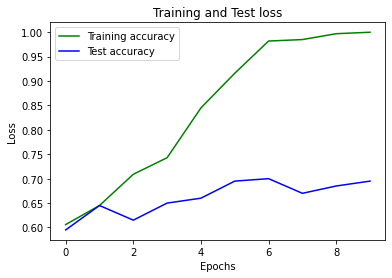

In [95]:
learning_rate = 1e-3

model = Net().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

training_loop(
    n_epochs = 10,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    print_plot = True,
    train_loader = train_loader,
    test_loader = test_loader
)